Treball Data Science: Kiran Dhillon, Sergi Moros, Sara Requena, Julià Mestieri

Dataset: https://www.kaggle.com/unsdsn/world-happiness

## Descripción del negocio o dominio

 - Definición de los objetivos del proyecto y compresión de los requerimientos. Se trata de definir el problema al que nos enfrentamos



## Load libraries and data

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry
import matplotlib.pyplot as plt

In [2]:
years = [2015, 2016, 2017, 2018, 2019]
ds_15 = pd.read_csv('data/2015.csv').drop(['Standard Error'],axis=1)
ds_15.rename(columns={"Happiness Rank": "Rank","Happiness Score":"Score","Economy (GDP per Capita)":"GDP","Family":"Social support","Health (Life Expectancy)":"Healthy","Trust (Government Corruption)":"Trust"},inplace=True)  
ds_15.insert(0, "Year", 2015)
ds_15['Rounded Score'] = ds_15['Score'].round(0)

ds_16 = pd.read_csv('data/2016.csv').drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1)
ds_16.rename(columns={"Happiness Rank": "Rank","Happiness Score":"Score","Economy (GDP per Capita)":"GDP","Family":"Social support","Health (Life Expectancy)":"Healthy","Trust (Government Corruption)":"Trust"},inplace=True) 
ds_16.insert(0, "Year", 2016)
ds_16['Rounded Score'] = ds_16['Score'].round(0)

ds_17 = pd.read_csv('data/2017.csv').drop(['Whisker.high','Whisker.low'],axis=1)
ds_17.rename(columns={"Happiness.Rank": "Rank","Happiness.Score":"Score","Economy..GDP.per.Capita.":"GDP","Family":"Social support","Health..Life.Expectancy.":"Healthy","Trust..Government.Corruption.":"Trust","Dystopia.Residual":"Dystopia Residual"},inplace=True) 
ds_17.insert(0, "Year", 2017)
ds_17 = ds_17.join(ds_15.set_index('Country')['Region'], on='Country')
ds_17['Rounded Score'] = ds_17['Score'].round(0)

ds_18 = pd.read_csv('data/2018.csv')
ds_18.rename(columns={"Country or region": "Country", "Overall rank": "Rank","Score":"Score","GDP per capita":"GDP","Healthy life expectancy":"Healthy","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust"},inplace=True)
ds_18.insert(0, "Year", 2018)
ds_18 = ds_18.join(ds_15.set_index('Country')['Region'], on='Country')
ds_18['Rounded Score'] = ds_18['Score'].round(0)

ds_19 = pd.read_csv('data/2019.csv')
ds_19.rename(columns={"Country or region": "Country", "Overall rank": "Rank","GDP per capita":"GDP","Healthy life expectancy":"Healthy","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust"},inplace=True)
ds_19.insert(0, "Year", 2019)
ds_19 = ds_19.join(ds_15.set_index('Country')['Region'], on='Country')
ds_19['Rounded Score'] = ds_19['Score'].round(0)

df = pd.concat([ds_15, ds_16, ds_17, ds_18, ds_19], sort=True, ignore_index=True)

df

,Country,Dystopia Residual,Freedom,GDP,Generosity,Healthy,Rank,Region,Rounded Score,Score,Social support,Trust,Year
0,Switzerland,2.51738,0.66557,1.39651,0.29678,0.94143,1,Western Europe,8.0,7.587,1.34951,0.41978,2015
1,Iceland,2.70201,0.62877,1.30232,0.43630,0.94784,2,Western Europe,8.0,7.561,1.40223,0.14145,2015
2,Denmark,2.49204,0.64938,1.32548,0.34139,0.87464,3,Western Europe,8.0,7.527,1.36058,0.48357,2015
3,Norway,2.46531,0.66973,1.45900,0.34699,0.88521,4,Western Europe,8.0,7.522,1.33095,0.36503,2015
4,Canada,2.45176,0.63297,1.32629,0.45811,0.90563,5,North America,7.0,7.427,1.32261,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,0.55500,0.35900,0.21700,0.61400,152,Sub-Saharan Africa,3.0,3.334,0.71100,0.41100,2019
778,Tanzania,NaN,0.41700,0.47600,0.27600,0.49900,153,Sub-Saharan Africa,3.0,3.231,0.88500,0.14700,2019
779,Afghanistan,NaN,0.00000,0.35000,0.15800,0.36100,154,Southern Asia,3.0,3.203,0.51700,0.02500,2019
780,Central African Republic,NaN,0.22500,0.02600,0.23500,0.10500,155,Sub-Saharan Africa,3.0,3.083,0.00000,0.03500,2019


In [3]:
""" Adding external data. """
edf = pd.read_csv('data/wdidata.csv')

In [4]:
df['Mujeres trab.agricultura'] = np.nan
df['GDP por trabajador'] = np.nan
df['Participación lab.1524'] = np.nan
df['Mujeres trab.servicios'] = np.nan
df['Mujeres desempleadas'] = np.nan
df['Hombres mas 80'] = np.nan
df['Trasporte aereo'] = np.nan
df['Mujeres desempleadas.1524'] = np.nan
df['Ratio dif empleo genero'] = np.nan
df['Refugiados'] = np.nan

for index, row in df.iterrows():
    country_name = row['Country']
    year = row['Year']
    if year in years:
        mujeres_campo = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.AGR.EMPL.FE.ZS')][str(year)]
        if mujeres_campo.values.size > 0:
            df.at[index, 'Mujeres trab.agricultura'] = mujeres_campo.values[0]
        gdp_por_trab = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.GDP.PCAP.EM.KD')][str(year)]
        if gdp_por_trab.values.size > 0:
            df.at[index, 'GDP por trabajador'] = gdp_por_trab.values[0]
        participacion = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.TLF.ACTI.1524.FE.ZS')][str(year)]
        if participacion.values.size > 0:
            df.at[index, 'Participación lab.1524'] = participacion.values[0]
        muj_trab_ser = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.SRV.EMPL.FE.ZS')][str(year)]
        if muj_trab_ser.values.size > 0:
            df.at[index, 'Mujeres trab.servicios'] = muj_trab_ser.values[0]
        muj_des = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.UEM.TOTL.FE.ZS')][str(year)]
        if muj_des.values.size > 0:
            df.at[index, 'Mujeres desempleadas'] = muj_des.values[0]
        hom_up_80 = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SP.POP.80UP.MA.5Y')][str(year)]
        if hom_up_80.values.size > 0:
            df.at[index, 'Hombres mas 80'] = hom_up_80.values[0]
        trans_aereo = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'IS.AIR.DPRT')][str(year)]
        if trans_aereo.values.size > 0:
            df.at[index, 'Transporte aereo'] = trans_aereo.values[0]
        muj_desem = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.UEM.1524.FE.ZS')][str(year)]
        if muj_desem.values.size > 0:
            df.at[index, 'Mujeres desempleadas.1524'] = muj_desem.values[0]
        diff_gen = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.TLF.CACT.FM.ZS')][str(year)]
        if diff_gen.values.size > 0:
            df.at[index, 'Ratio dif empleo genero'] = diff_gen.values[0]
        refug = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SM.POP.REFG.OR')][str(year)]
        if refug.values.size > 0:
            df.at[index, 'Refugiados'] = refug.values[0]

df

,Country,Dystopia Residual,Freedom,GDP,Generosity,Healthy,Rank,Region,Rounded Score,Score,...,GDP por trabajador,Participación lab.1524,Mujeres trab.servicios,Mujeres desempleadas,Hombres mas 80,Trasporte aereo,Mujeres desempleadas.1524,Ratio dif empleo genero,Refugiados,Transporte aereo
0,Switzerland,2.51738,0.66557,1.39651,0.29678,0.94143,1,Western Europe,8.0,7.587,...,103602.585938,68.313004,87.030998,4.912,3.705261,NaN,8.390000,84.080678,17.0,250094.0
1,Iceland,2.70201,0.62877,1.30232,0.43630,0.94784,2,Western Europe,8.0,7.561,...,75040.609375,81.785004,91.330002,4.051,3.029846,NaN,6.638000,90.302418,NaN,35558.0
2,Denmark,2.49204,0.64938,1.32548,0.34139,0.87464,3,Western Europe,8.0,7.527,...,94613.531250,62.389999,89.277000,6.444,3.218882,NaN,10.027000,86.857312,9.0,NaN
3,Norway,2.46531,0.66973,1.45900,0.34699,0.88521,4,Western Europe,8.0,7.522,...,125677.398438,56.618000,91.870003,3.999,3.129684,NaN,8.565000,89.632442,12.0,NaN
4,Canada,2.45176,0.63297,1.32629,0.45811,0.90563,5,North America,7.0,7.427,...,84005.359375,64.448997,90.433998,6.285,3.270799,NaN,11.228000,86.295118,80.0,1322033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,0.55500,0.35900,0.21700,0.61400,152,Sub-Saharan Africa,3.0,3.334,...,4223.943848,63.733002,25.662001,1.070,NaN,NaN,2.157000,100.684972,NaN,NaN
778,Tanzania,NaN,0.41700,0.47600,0.27600,0.49900,153,Sub-Saharan Africa,3.0,3.231,...,6497.994141,69.106003,29.461000,2.462,NaN,NaN,4.179000,91.100099,NaN,NaN
779,Afghanistan,NaN,0.00000,0.35000,0.15800,0.36100,154,Southern Asia,3.0,3.203,...,6984.897949,20.403999,10.079000,14.004,NaN,NaN,21.191999,28.925233,NaN,NaN
780,Central African Republic,NaN,0.22500,0.02600,0.23500,0.10500,155,Sub-Saharan Africa,3.0,3.083,...,2048.333984,52.889000,15.996000,3.565,NaN,NaN,5.387000,80.776175,NaN,NaN


## EDA: Estudio y Visualización de los datos

 - Recopilación inici
 al de datos para familiarizarse. Identificación de los problemas debidos a la calidad de los datos
 - Recopilar más datos: número de ejemplos de entrenamiento o nuevas fuentes de datos
 - Visualización de datos
 - Histograma
 - Distribución de los datos (normal, uniforme…)
 - Diagramas de caja o Box Plot
 - Diagrama de dispersión (scatterplot)


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


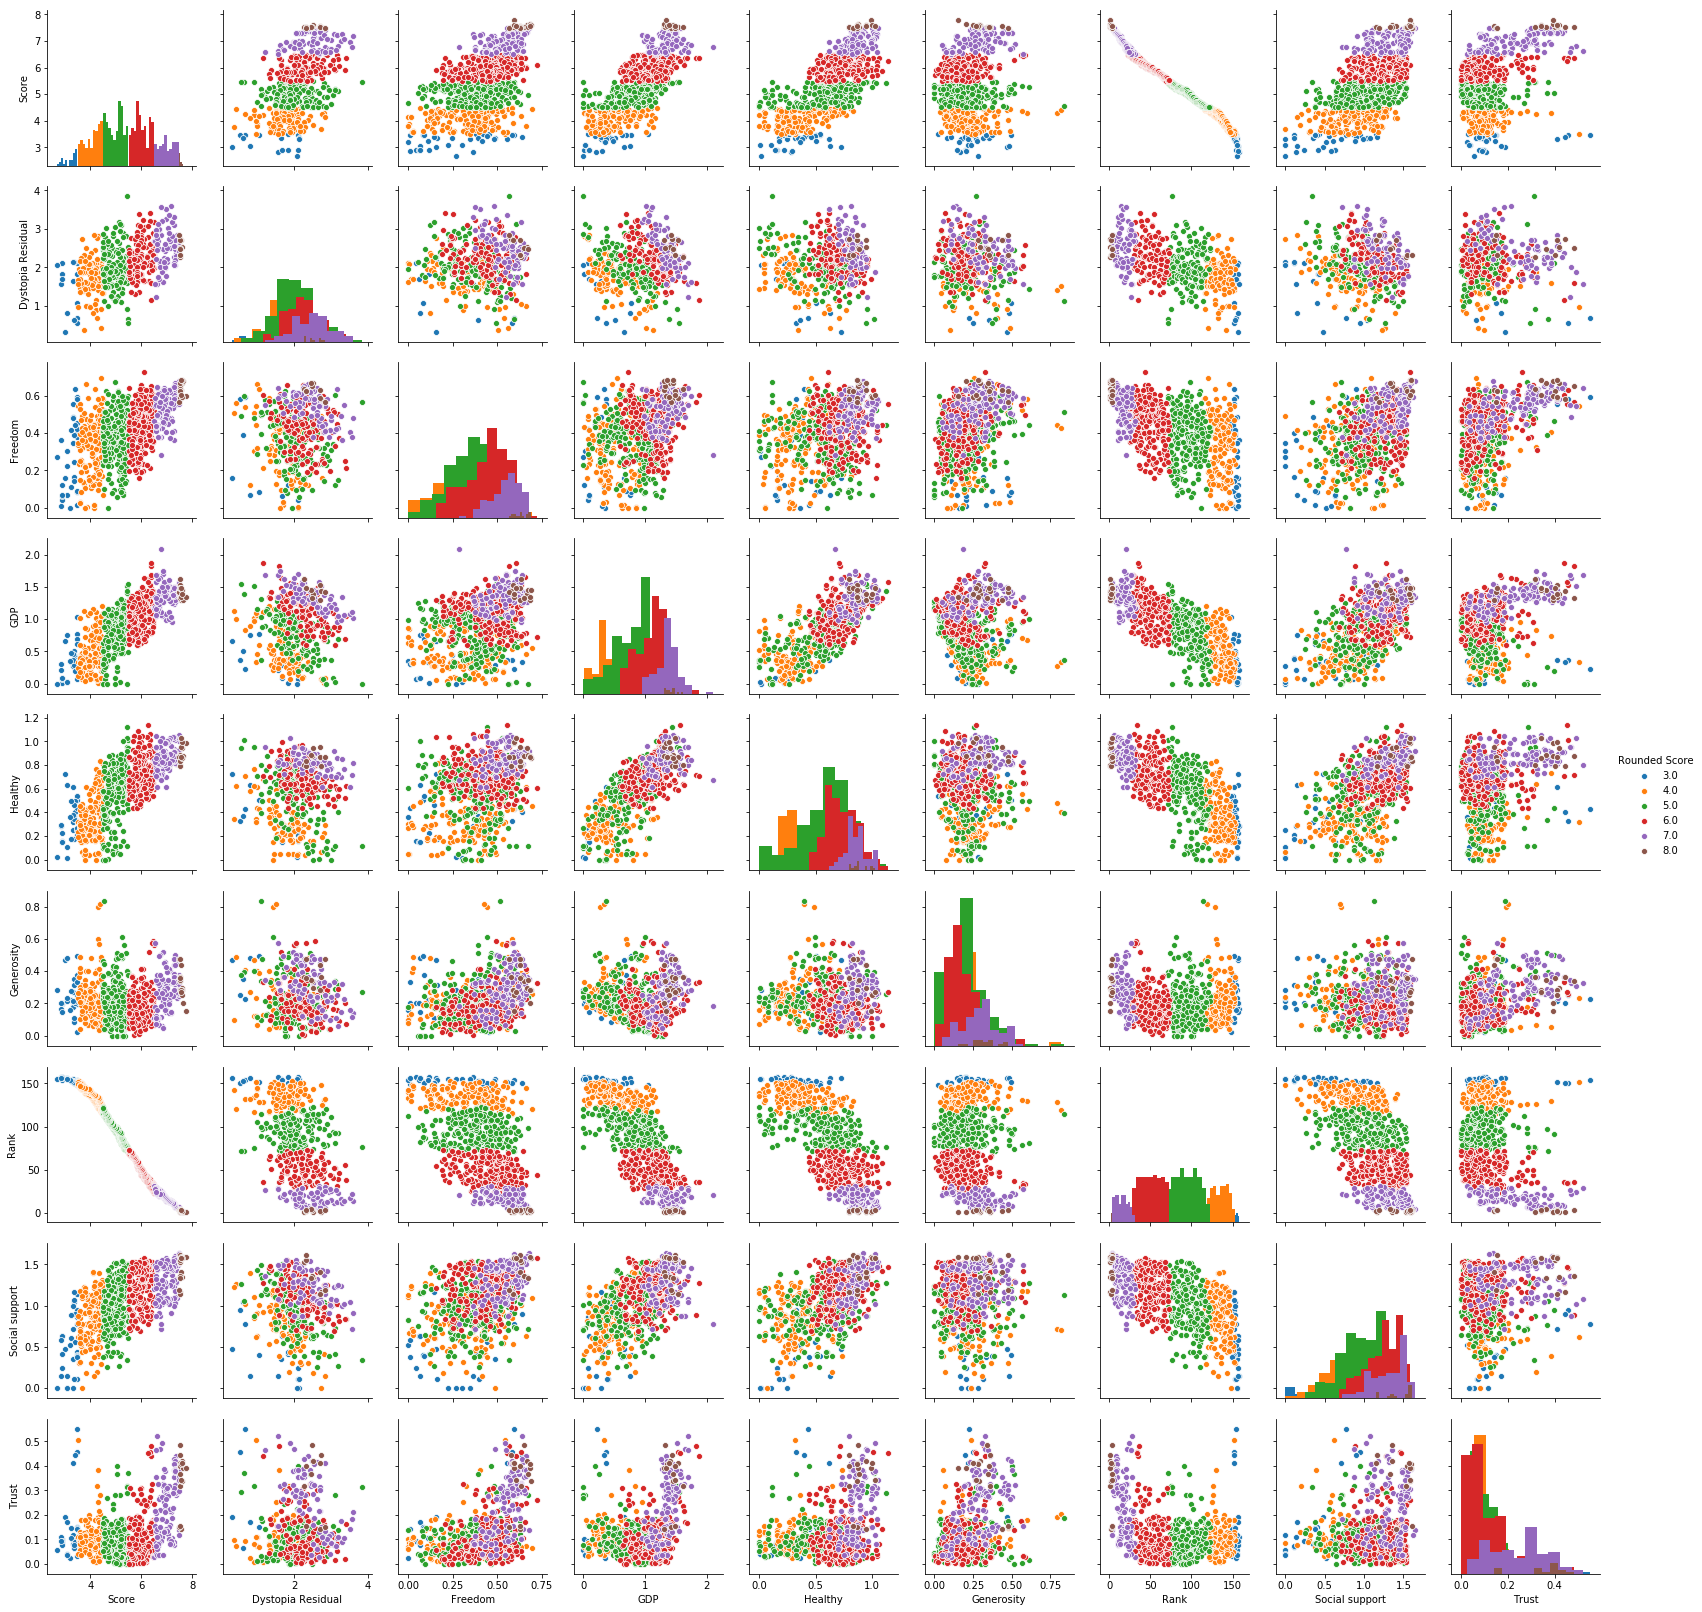

In [9]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
sns.pairplot(df, diag_kind='hist', hue='Rounded Score', vars=['Score','Dystopia Residual','Freedom','GDP','Healthy','Generosity','Rank','Social support','Trust'])

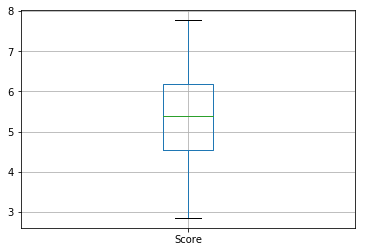

In [14]:
ds_19.boxplot('Score')

In [15]:
# Correlation https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607
df.corr()

,Dystopia Residual,Freedom,GDP,Generosity,Healthy,Rank,Rounded Score,Score,Social support,Trust,...,GDP por trabajador,Participación lab.1524,Mujeres trab.servicios,Mujeres desempleadas,Hombres mas 80,Trasporte aereo,Mujeres desempleadas.1524,Ratio dif empleo genero,Refugiados,Transporte aereo
Dystopia Residual,1.000000,0.038422,0.030087,-0.114468,0.057674,-0.482706,0.496164,0.489747,-0.081537,0.000001,...,0.039140,-0.021286,0.167129,-0.053304,0.076045,NaN,-0.062146,-0.123672,-0.013547,0.073710
Freedom,0.038422,1.000000,0.340511,0.290706,0.340745,-0.537942,0.526308,0.551258,0.420361,0.459593,...,0.354584,0.274788,0.350941,-0.365352,0.196062,NaN,-0.273544,0.129057,-0.229900,0.129363
GDP,0.030087,0.340511,1.000000,-0.014560,0.784338,-0.794791,0.751198,0.789284,0.585966,0.306307,...,0.871926,-0.149250,0.819297,0.086647,0.636327,NaN,0.186743,-0.091070,-0.278939,0.207766
Generosity,-0.114468,0.290706,-0.014560,1.000000,0.010638,-0.117713,0.120716,0.137578,-0.037262,0.318920,...,0.082896,0.352215,-0.019506,-0.346545,-0.016758,NaN,-0.329513,0.137222,0.119599,0.100878
Healthy,0.057674,0.340745,0.784338,0.010638,1.000000,-0.743655,0.700832,0.742456,0.572650,0.250512,...,0.685699,-0.072653,0.696151,-0.035482,0.748967,NaN,0.082437,-0.080213,-0.285942,0.198480
Rank,-0.482706,-0.537942,-0.794791,-0.117713,-0.743655,1.000000,-0.958419,-0.992066,-0.644842,-0.372781,...,-0.724311,-0.012978,-0.765997,0.136987,-0.583901,NaN,0.044047,0.044456,0.268205,-0.212865
Rounded Score,0.496164,0.526308,0.751198,0.120716,0.700832,-0.958419,1.000000,0.966224,0.615860,0.375974,...,0.700717,0.046551,0.734871,-0.138028,0.564394,NaN,-0.062363,0.001839,-0.267406,0.196978
Score,0.489747,0.551258,0.789284,0.137578,0.742456,-0.992066,0.966224,1.000000,0.648799,0.398418,...,0.727041,0.034903,0.758913,-0.131940,0.592967,NaN,-0.045776,-0.034359,-0.275363,0.219052
Social support,-0.081537,0.420361,0.585966,-0.037262,0.572650,-0.644842,0.615860,0.648799,1.000000,0.126401,...,0.507272,0.014544,0.602252,-0.041373,0.466035,NaN,0.024711,0.079140,-0.282527,0.115588
Trust,0.000001,0.459593,0.306307,0.318920,0.250512,-0.372781,0.375974,0.398418,0.126401,1.000000,...,0.510555,0.279294,0.261168,-0.158622,0.164420,NaN,-0.169523,0.071876,-0.026414,0.049239


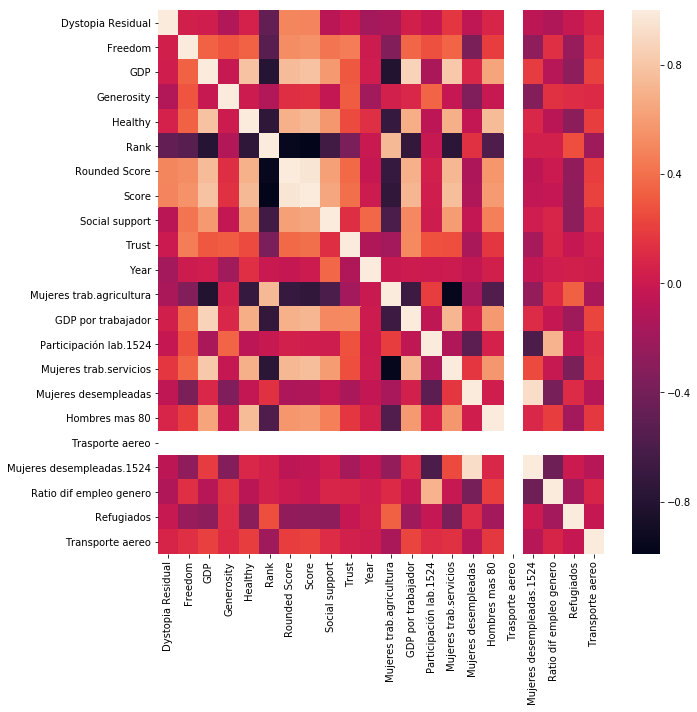

In [18]:
f,ax=plt.subplots(figsize=(10,10))
cor = df.corr() 
sns.heatmap(cor)

In [19]:
df.describe()

,Dystopia Residual,Freedom,GDP,Generosity,Healthy,Rank,Rounded Score,Score,Social support,Trust,...,GDP por trabajador,Participación lab.1524,Mujeres trab.servicios,Mujeres desempleadas,Hombres mas 80,Trasporte aereo,Mujeres desempleadas.1524,Ratio dif empleo genero,Refugiados,Transporte aereo
count,470.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,...,682.000000,682.000000,682.000000,682.000000,547.000000,0.0,682.000000,682.000000,5.320000e+02,4.710000e+02
mean,2.092717,0.411091,0.916047,0.218576,0.612416,78.698210,5.358056,5.379018,1.078392,0.125436,...,43545.999173,38.534098,63.859000,8.261427,1.573325,NaN,18.005497,72.665327,7.604131e+04,2.787015e+05
std,0.565772,0.152880,0.407340,0.122321,0.248309,45.182384,1.147142,1.127456,0.329548,0.105816,...,38366.754797,16.592250,24.717520,6.859456,1.406398,NaN,14.374930,18.584835,3.046050e+05,9.841274e+05
min,0.328580,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.693000,0.000000,0.000000,...,1026.063965,4.893000,3.446000,0.360000,0.076556,NaN,0.357000,15.264789,1.000000e+00,1.000000e+01
25%,1.737975,0.309768,0.606500,0.130000,0.440183,40.000000,5.000000,4.509750,0.869363,0.054000,...,11622.167236,26.883000,43.607749,3.625000,0.375154,NaN,8.005000,63.875658,1.577500e+02,1.165350e+04
50%,2.094640,0.431000,0.982205,0.201982,0.647310,79.000000,5.000000,5.322000,1.124735,0.091000,...,34027.548828,34.982500,72.304501,5.752500,1.159445,NaN,12.841000,78.034691,1.425000e+03,4.645000e+04
75%,2.455575,0.531000,1.236187,0.278832,0.808000,118.000000,6.000000,6.189500,1.327250,0.156030,...,67094.191406,50.846001,85.179996,10.701750,2.639592,NaN,23.587500,84.995832,1.244175e+04,1.705130e+05
max,3.837720,0.724000,2.096000,0.838075,1.141000,158.000000,8.000000,7.769000,1.644000,0.551910,...,205734.984375,83.412003,97.890999,31.020000,6.166254,NaN,70.607002,104.173599,2.681269e+06,9.879630e+06


In [20]:
df.groupby(by='Year')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.52600,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.10150,7.537
2018,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
2019,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769


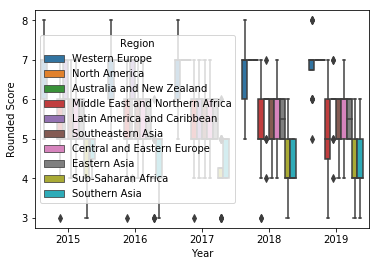

In [21]:
sns.boxplot(x="Year", y="Rounded Score", hue="Region", data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

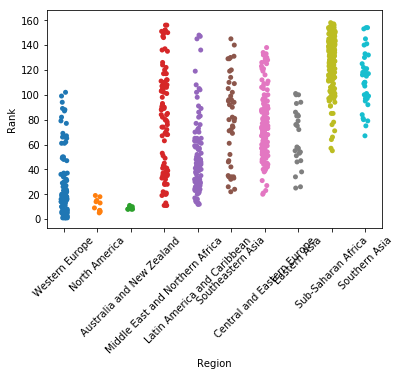

In [22]:
sns.stripplot(x="Region", y="Rank", data=df)
plt.xticks(rotation=45)

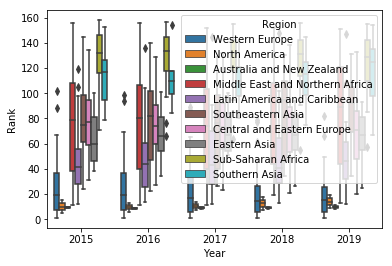

In [23]:
sns.boxplot(x="Year", y="Rank", hue="Region", data=df)

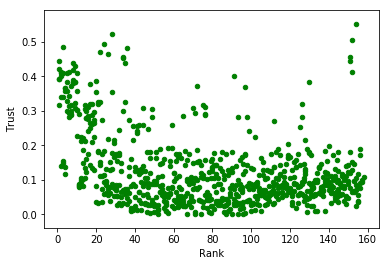

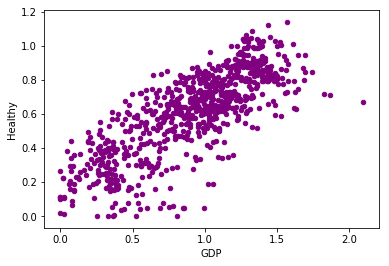

In [24]:
df.plot(kind='scatter', x='Rank', y='Trust',color = 'green')
df.plot(kind='scatter', x='GDP', y='Healthy',color = 'purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4669a24d0>]],
      dtype=object)

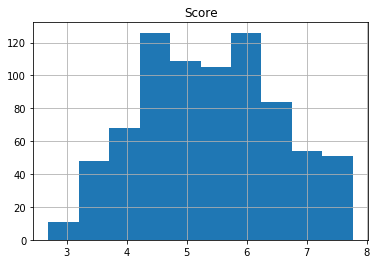

In [25]:
df.hist(column='Score')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

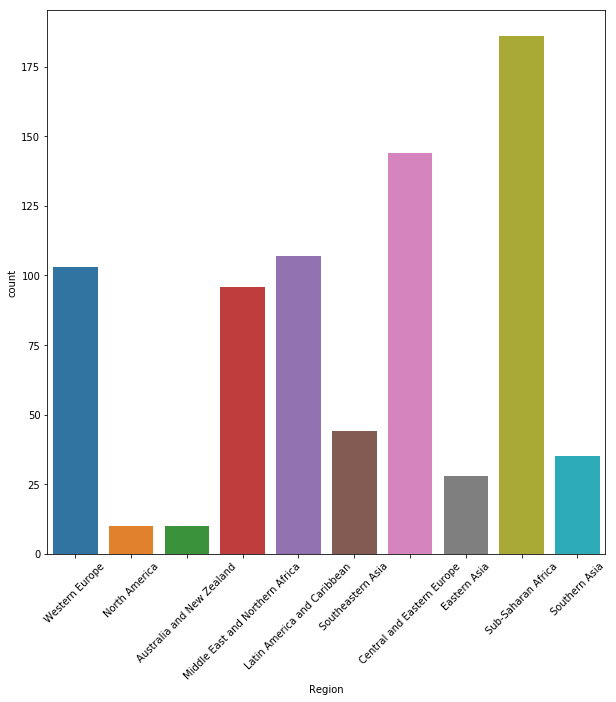

In [26]:
f,ax = plt.subplots(figsize =(10,10))
sns.countplot(df.Region)
plt.xticks(rotation= 45)

## Preparación de los datos
 - Selección de tablas, de las instancias y atributos. Transformación limpieza de los datos
 - Selección de características: reducir el número de atributos o añadir nuevos atributos
 - Resumen de características/atributos
 - Valores numéricos o nominales
 - Numéricos: Medias, mínimos, máximos,  desviación
 - Nominales: valores permitidos
 - Detección de datos erróneos
 - Análisis de valores atípicos (outliers)
 - Estrategia a seguir con los datos faltantes: Eliminar, inferir…
 - Selección de variables relevantes: Reducción de la dimensionalidad,Construcción de atributos

## Modelado
 - Selección y aplicación de las técnicas de modelado más apropiadas
 - Calibración de los parámetros
 - Determinar el tipo de tarea: Clasificación, regresión, agrupamiento,…
 - Elegir el tipo de modelo: Árboles de decisión, regresión logística, SVM,…
 - Elegir el algoritmo: CART o C5.0
 - Añadir una introducción teórica del modelo utilizado (búsqueda bibliográfica) y los parámetros que dispone



## Evaluación
 - Evaluación de los resultados contrastados con los objetivos de negocio
 - Revisar tema de evaluación de modelos
 - Métricas
 - Costes 


## Despliegue
 - Despliegue del modelo obtenido
 - ¿Cómo lo vais a utilizar una vez creado)
